# Using clusters

what is it?
- now that we have made our clusters, how do we use them?

what do we care? 
- to get some usefulness out of our supervised learning

## Clusters are about providing options and insight

- Step 1: Explore the clusters
- Step 2: Name the clusters
- Step 3: 
    - Option 1: Dimensionality reduction
    - Option 2: Treat cluster names as a new target variable
    - Option 3: Perform deeper EDA
    - Option 4: Make many models

# Show us!

Scenario: Analyzing our mall data and seeing how unsupervised learning can drive our data insights

In [1]:
#do the data things
import pandas as pd
import numpy as np

#visualize & stastisize
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#prepore and model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#my creds
from env import get_connection_url

## Acquire

In [2]:
#get my data
df = pd.read_sql('SELECT * FROM customers;', get_connection_url('mall_customers'))
df = df.set_index('customer_id')

#see it
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## Prepare

Since my dataset was so small, I made my validate and test dataframes smaller than normal
- this is probably too small to be utilized in the real world
- the tiny validate and test are just to show the steps of working through a split df

In [4]:
def train_validate_test_split(df, seed=123):
    '''
    accepts dataframe and splits the data into train, validate and test 
    '''
    train_validate, test = train_test_split(df, test_size=0.05, random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.05, random_state=seed)
    return train, validate, test

In [5]:
def scale_my_data(train, validate, test, features):
    '''
    scale my data using minmaxscaler, input the features to scale
    '''
    scaler = MinMaxScaler()
    scaler.fit(train[features])
    
    train_scaled = scaler.transform(train[features])
    validate_scaled = scaler.transform(validate[features])
    test_scaled = scaler.transform(test[features])

    train_scaled = pd.DataFrame(train_scaled, index=train.index, columns=features)
    validate_scaled = pd.DataFrame(validate_scaled, index=validate.index, columns=features)
    test_scaled = pd.DataFrame(test_scaled, index=test.index, columns=features)
    
    return train_scaled, validate_scaled, test_scaled

In [6]:
def prep_mall(df):
    '''
    dummy var for gender into is_male
    split on target of 'spending_score'
    scale age and annual income. 
    '''
#     df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']
    train, validate, test = train_validate_test_split(df)
    
    print(f'df: {df.shape}')
    print()
    print(f'train: {train.shape}')
    print(f'validate: {validate.shape}')
    print(f'test: {test.shape}')
    return train, validate, test

In [7]:
#prep my data!
train, validate, test = prep_mall(df)

df: (200, 4)

train: (180, 4)
validate: (10, 4)
test: (10, 4)


In [8]:
train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
53,Female,31,43,54
98,Female,27,60,50
198,Male,32,126,74
43,Male,48,39,36
160,Female,30,78,73


In [9]:
features_to_scale = ['age','annual_income','spending_score']

In [10]:
train_scaled, validate_scaled, test_scaled = scale_my_data(train, validate, test, features_to_scale)
train_scaled

,age,annual_income,spending_score
customer_id,,,
53,0.250000,0.229508,0.540816
98,0.173077,0.368852,0.500000
198,0.269231,0.909836,0.744898
43,0.576923,0.196721,0.357143
160,0.230769,0.516393,0.734694
...,...,...,...
27,0.519231,0.106557,0.316327
164,0.250000,0.540984,0.938776
193,0.288462,0.803279,0.071429


## Explore

We explored all the things!
- hypothesize
- visualize
- statisticize
- summarize

We found that age, annual_income, and spending score looked like were good canidates for clusters. 

We utilized the elbow method to determine the best number of clusters

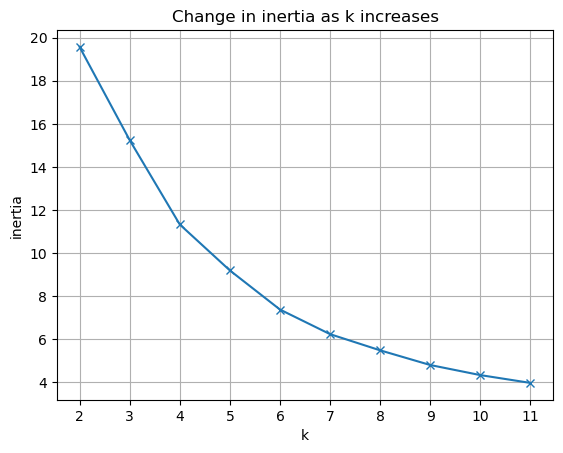

In [11]:
# lets plot inertia vs k
pd.Series(
    {k: KMeans(k, random_state=42, n_init=10).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.grid()

#### Move forward optimal cluster number (i choose 4)

In [26]:
#make it
kmeans = KMeans(n_clusters=4,5,7, random_state=42, n_init=10)

#fit it
kmeans.fit(train_scaled)

#use it
kmeans.predict(train_scaled)

SyntaxError: positional argument follows keyword argument (1567659435.py, line 2)

#### Now save all of the newly created clusters

In [13]:
# And assign the cluster number to a column on the dataframe
train_scaled["cluster"] = kmeans.predict(train_scaled)
train_scaled.head()

,age,annual_income,spending_score,cluster
customer_id,,,,
53,0.250000,0.229508,0.540816,2
98,0.173077,0.368852,0.500000,2
198,0.269231,0.909836,0.744898,0
43,0.576923,0.196721,0.357143,1
160,0.230769,0.516393,0.734694,0


## Yay clusters! What next?

- Step 1: Explore the clusters
- Step 2: Name the clusters
- Step 3: 
    - Option 1: Dimensionality reduction
    - Option 2: Treat cluster names as a new target variable
    - Option 3: Perform deeper EDA
    - Option 4: Make many models

### Step 1: Explore the clusters

see how they are similiar or different

In [14]:
# plot out income vs. spending with regard to the cluster and age


### Step 2: Name the clusters 

use natural, descriptive language

In [15]:
#rename using map


### Step 3: Options

#### Let's say our mall dataset had more features in it, this will allow us to better utilize our clusters

In [16]:
train['transportation'] = np.random.choice(['personal_vehicle','walking','dropoff'],len(train),p=[.75,0.05,.2])
train['group_size'] = np.random.randint(1,10,len(train))
train['hair_color'] = np.random.choice(['black','brown','blonde','grey','other'],len(train))

In [17]:
train.head()

,gender,age,annual_income,spending_score,transportation,group_size,hair_color
customer_id,,,,,,,
53,Female,31,43,54,personal_vehicle,8,other
98,Female,27,60,50,personal_vehicle,7,brown
198,Male,32,126,74,personal_vehicle,4,blonde
43,Male,48,39,36,personal_vehicle,1,black
160,Female,30,78,73,personal_vehicle,1,blonde


### Option 1: Use the clusters to simplify multiple other variables
- Since the cluster names make sense, we can use them instead of age, spending, and income
    - this potentially makes our features simplier and easier to explain
        - helpful for storytelling
    - this allows us to reduce features
        - likely help model performance (regression, classification)

#### lets say we wanted to predict transportation

we will now build a classification model since we have a target

In [18]:
#define y_train


without our clusters

In [19]:
#define X_train


with our clusters

In [20]:
#define X_train


### Option 2: Use cluster names as a target variable to classify new data

#### our new clusters can be our target variable

we can once again build a classification model using our new target variable

In [21]:
#define y_train


#### our X_train can NOT include features that were used to calculate our target variable

In [22]:
#define X_train


### Option 3: Perform deeper EDA
Sometimes the identification of clusters gives us additional questions we need to ask.
- hypothesize
- visualize
- statisticize
- summarize

#### How do the customer groups relate to hair color?

#### How do the customer groups compare to the group size?

### Option 4: Create a Many Models Approach

For each unique value in our cluster, build a separate model. Therefore, each cluser can have it's own model

In [23]:
train.cluster.value_counts()

AttributeError: 'DataFrame' object has no attribute 'cluster'

#### Model 1 -  Young people who are low income and spend a lot

In [ ]:
to_drop = ['age', 'annual_income', 'spending_score'] #Option for dataset put into your model

#### Model 2 - Old people who are low income and spend low amounts

In [ ]:
#Option for dataset/feature set put into your model

#### Model 3 - Young people who make a lot and spend a lot

In [ ]:
#Option for dataset/feature set put into your model

#### Model 4 - Old people who make a lot and spend a little

In [ ]:
#Option for dataset/feature set put into your model